In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/wangweiran/Desktop/CS433-Machine Learning/EPFL_CS433_Machine-Learning/labs/ex02/template')
from costs import *
from grid_search import *

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    # w* = (X^T*X)^{-1} * X^T * y
    # optimal_w_1 = np.dot(np.dot(np.linalg.inv(np.dot(tx.T, tx)), tx.T), y)
    # x^T * x * w = x^T * y
    optimal_w = np.linalg.solve(np.dot(tx.T, tx), np.dot(tx.T, y))
    
    
    # compute_loss(y, tx, w, flag = 0)
    mse = compute_loss(y, tx, optimal_w)
    
    return mse, optimal_w
    
    # raise NotImplementedError

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    #print(tx)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************\
    
    optimal_w_least_square = least_squares(y, tx)[1]
    # optimal_w_least_square_1 = least_squares(y, tx)[2]
    
    # grid_search(y, tx, w0, w1)
    w0, w1 = generate_w(100)
    losses = grid_search(y, tx, w0, w1)
    optimal_w_grid_search = get_best_parameters(w0, w1, losses)[1], get_best_parameters(w0, w1, losses)[2]
    
    print("optimal w got from least square", optimal_w_least_square)
    # print("optimal w got from least square 1", optimal_w_least_square_1)
    print("optimal w got from grid search", optimal_w_grid_search)
    
    #raise NotImplementedError

Test it here

In [4]:
test_your_least_squares()

optimal w got from least square [73.293922   13.47971243]
optimal w got from grid search (72.72727272727272, 13.636363636363626)


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [6]:
def build_poly(x, degree):
    # degree is the polynomial degree, e.g.
    # degree = 3
    # fw(X) = w0 + w1*x + w2*(x^2) + w3*(x^3)
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    

    # ones = np.ones([np.shape(x)[0], 1])
    
    phi_xn = np.zeros([np.shape(x)[0], degree+1])
    
    for i in range(np.shape(x)[0]):
        for j in range(degree+1):
            phi_xn[i][j] = pow(x[i], j)
            
    # phi = np.hstack((ones, phi_xn))
            
    return phi_xn
    

    #raise NotImplementedError

In [7]:
array_test = build_poly(x, 1)
print(np.shape(array_test))
print(array_test)

(50, 2)
[[1.         0.35237491]
 [1.         4.8951233 ]
 [1.         1.86662437]
 [1.         3.50706129]
 [1.         3.38087384]
 [1.         0.73093728]
 [1.         3.88562366]
 [1.         5.65224803]
 [1.         6.28318531]
 [1.         2.37137419]
 [1.         0.60474982]
 [1.         3.63324875]
 [1.         0.85712473]
 [1.         2.49756165]
 [1.         1.61424946]
 [1.         5.39987312]
 [1.         6.15699785]
 [1.         6.0308104 ]
 [1.         0.47856237]
 [1.         2.87612401]
 [1.         4.51656093]
 [1.         0.98331219]
 [1.         1.10949964]
 [1.         0.1       ]
 [1.         2.11899928]
 [1.         1.36187455]
 [1.         4.01181111]
 [1.         5.77843549]
 [1.         4.26418602]
 [1.         1.2356871 ]
 [1.         2.24518674]
 [1.         1.99281183]
 [1.         1.48806201]
 [1.         4.64274839]
 [1.         4.39037348]
 [1.         3.00231147]
 [1.         0.22618746]
 [1.         5.27368567]
 [1.         5.02131076]
 [1.         5.52

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [8]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        
        tx = build_poly(x, degree)
        
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        
        # RMSE = np.sqrt(2 * MSE(w))
        
        mse_ls, weights = least_squares(y, tx)
        rmse = np.sqrt(2 * mse_ls)
        
        #raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248672


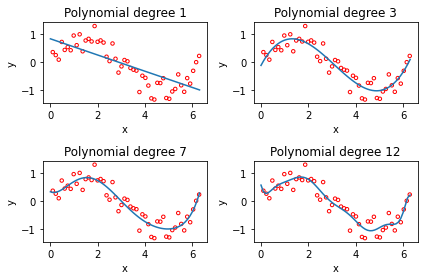

In [9]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [10]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    
    # Change the order of samples
    index = np.random.permutation(x.shape[0])
    split_location = int(np.floor(ratio * x.shape[0]))
    
    index_train = index[:split_location]
    index_test = index[split_location:]
    
    x_train = x[index_train]
    x_test = x[index_test]
    
    y_train = y[index_train]
    y_test = y[index_test]
    
    return x_train, y_train, x_test, y_test
    
    #raise NotImplementedError

Then, test your `split_data` function below.

In [11]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    
    #raise NotImplementedError
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    
    phi_x_train = build_poly(x_train, degree)
    phi_x_test = build_poly(x_test, degree)
    
    #raise NotImplementedError
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    
    mse_train, weight_train = least_squares(y_train, phi_x_train)
    # mse_test, weight_test = least_squares(y_test, phi_x_test)
    mse_test = compute_loss(y_test, phi_x_test, weight_train)
    
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    
    rmse_tr = np.sqrt(2*mse_train)
    rmse_te = np.sqrt(2*mse_test)
    
    #raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [12]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.250
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.548
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.254
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=4.651


# 3 Ridge Regression
Please fill in the function below.

In [13]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    
    # left_part * w_ridge = right_part
    left_part = np.dot(tx.T, tx) + lambda_ * 2 * np.shape(tx)[0] * np.eye(np.shape(tx)[1])
    # print("lambda here is ", np.dot(lambda_ * 2 * np.shape(tx)[0], np.eye(np.shape(tx)[0])))
    # print("left part's shape: ", np.shape(left_part))
    right_part = np.dot(tx.T, y)
    #print("right part's shape: ", np.shape(right_part))
    
    w_ridge = np.linalg.solve(left_part, right_part)
    # w_ridge = np.dot(np.linalg.inv(np.dot(tx.T, tx) + lambda_), np.dot(tx.T, y))
    mse_ridge = compute_loss(y, tx, w_ridge)
    
    return mse_ridge, w_ridge
    
    #raise NotImplementedError

In [19]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    
    tx_train = build_poly(x_train, degree)
    tx_test = build_poly(x_test, degree)
    
    #raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        mse_train, w_train = ridge_regression(y_train, tx_train, lambda_)
        #mse_test, w_test = ridge_regression(y_test, tx_test, lambda_)
        mse_test = compute_loss(y_test, tx_test, w_train)
        
        rmse_tr.append(np.sqrt(2*mse_train))
        rmse_te.append(np.sqrt(2*mse_test))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    #raise NotImplementedError


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.193, 

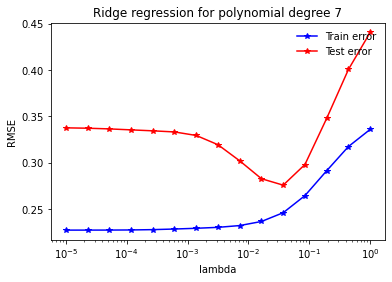

In [20]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)